In [14]:
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
# from evaluate.lane import LaneEval
%matplotlib inline

In [35]:
DATA_PATH = "../test_set"
JSON_PATH = "json/output2.json"
OUTPUT_PATH = "../test_set/test_output"

<h3>Task 1</h3>

In [16]:
test_json = [json.loads(line) for line in open('json/test_label.json').readlines()]

In [17]:
test_json[0].keys()

dict_keys(['lanes', 'h_samples', 'raw_file'])

In [18]:
def uno_instance(i):
    test_instance = test_json[i]
    gt_lanes = test_instance['lanes']
    y_samples = test_instance['h_samples']
    raw_file = os.path.join(DATA_PATH, test_instance['raw_file'])
    img = plt.imread(raw_file)
    gt_lanes_vis = [[(x, y) for (x, y) in zip(lane, y_samples) if x >= 0] for lane in gt_lanes]
    img_vis = img.copy()

    for lane in gt_lanes_vis:
        for pt in lane:
            cv2.circle(img_vis, pt, radius=5, color=(0, 255, 0))

    plt.imshow(img_vis)
    plt.show()

    return

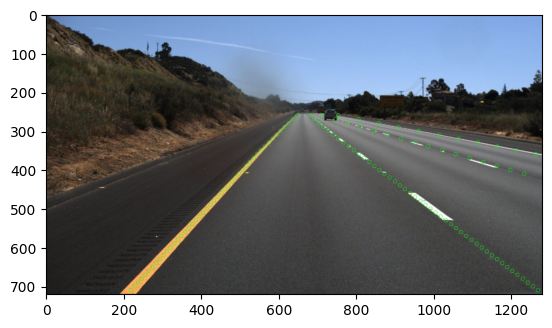

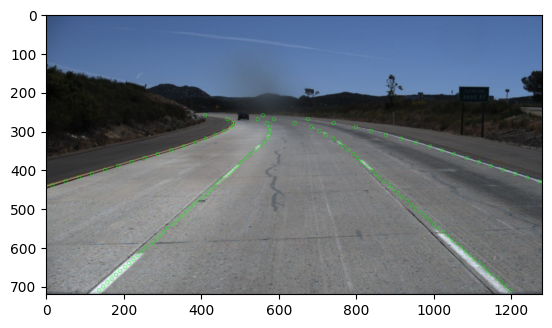

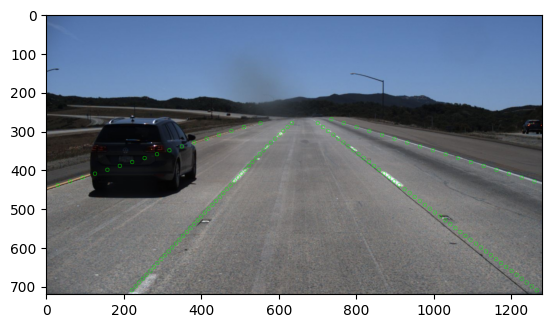

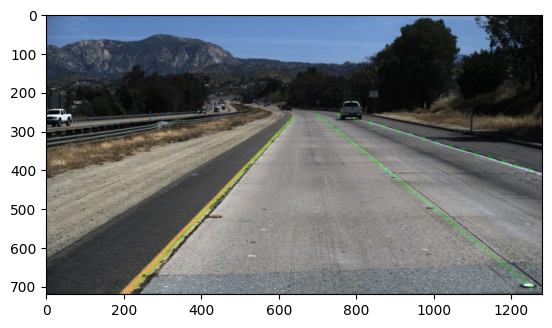

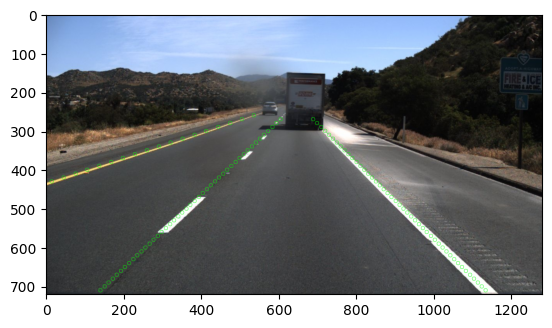

In [19]:
for i in range(5):
    uno_instance(i)

<h3>Task 2</h3>

Their postprocess functions draws circles on each lines detected by one of their postprocess functions.
I store those points in a json file and also store the binary, instance seg masks if needed later. 
Then use the json file for Task 3.

Have modified the original notebook of laneNet detection to only run on 15 random images from the test set.

In [20]:
!python evaluate_lanenet_on_tusimple.py --image_dir ../test_set/clips --weights_path weights/tusimple_lanenet.ckpt --save_dir ../test_set/test_output --save_json JSON_PATH

/bin/bash: /home/shayaan/anaconda3/envs/laneNet/lib/libtinfo.so.6: no version information available (required by /bin/bash)


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.


Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).
Instructions for updating:
Please use `layer.__call__` method instead.






2022-11-22 23:39:39.820956: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-11-22 23:39:39.842174: I ten

In [33]:
with open(JSON_PATH, 'r') as openfile:
 
    # Reading from json file
    json_object = json.load(openfile)
 
key = list(json_object.keys())[0]
value = json_object[key]
print("Image path ", key)
print("Num of lanes ", len(value))
for i in range(len(value)):
    print("Lane ", i, " has ", len(value[i]), " points")

Image path  clips/0530/1492628715137318229_0/19.jpg
Num of lanes  2
Lane  0  has  37  points
Lane  1  has  47  points


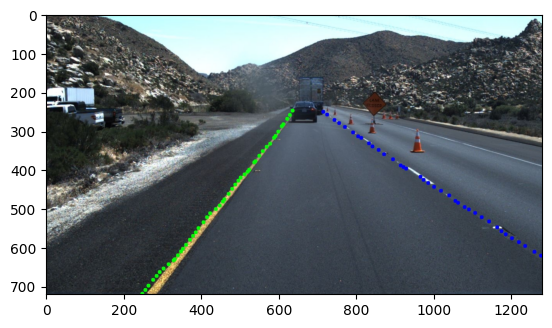

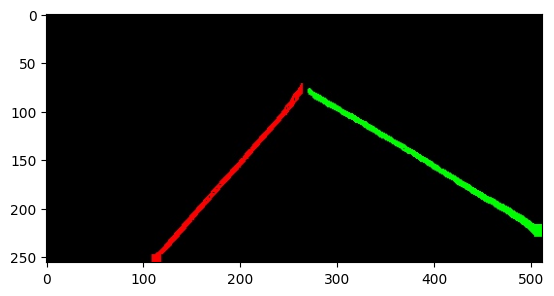

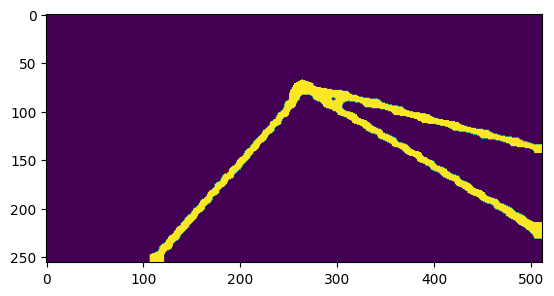

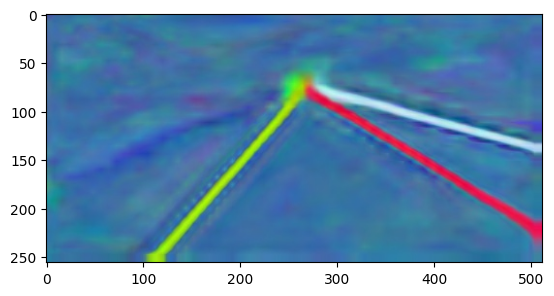

In [43]:
key_dir = "/".join(key.split('/')[1:-1])
outputPath = os.path.join(OUTPUT_PATH, key_dir)
os.listdir(outputPath)
for img in os.listdir(outputPath):
    img = plt.imread(os.path.join(outputPath, img))
    plt.imshow(img)
    plt.show()